In [1]:
import pandas as pd
import numpy as np

# 可視化用のライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import neologdn
import MeCab

import re

from gensim.models.doc2vec import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

from sklearn import datasets

# 前処理用モジュール
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors


from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, roc_curve

from sklearn.decomposition import PCA #主成分分析器

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### サンプルデータの読み込み

In [2]:
#encoding='utf-8'で上手くいった
df = pd.read_csv('posi_nega_alldata.csv', encoding='utf-8')

In [3]:
df

,text,posi_nega
0,案件個別の技術相談乗ってます！乗ります,1
1,勉強とお仕事が有機的に繋がっていて面白い。,1
2,次々とテクニックを教えていただき、ためになりました,1
3,お肉がキレイに焼けたことに小さなしあわせを感じた,1
4,これが私の最適化,1
5,データの抽出やグラフ化も、問題なさそう。,1
6,PC復帰するまでみんなの日報読んでコメントしてスッキリする。,1
7,久々に新卒が自社にまあまあいて嬉しかった,1
8,おでんが美味しい季節だなぁ,1
9,昼飯には少し割高な値段であったが満足感があった。,1


### neologdn.normalize()を使用して文章全体を正規化しMeCab + neologdで形態素解析、品詞で単語を絞った後に出現頻度0以上の単語を抽出してリストに格納する

In [4]:
def get_mecabed_word_list(text):
    sentence_normalization = neologdn.normalize(text)
    neologd_tagger = MeCab.Tagger('-Ochasen -d C:\mecab-ipadic-neologd')
    
    # neologd_tagger.parse(text)で各単語の原形、品詞などが1行で連続して表示される
    # 原形、品詞などの間には「\t」が、分かち書きされた単語と単語の区切りには「\n」が表示される
    # 例: '空い\tアイ\t空く\t動詞-自立\t五段・カ行イ音便\t連用タ接続\nた\tタ\tた\t助動詞\t特殊・タ\t基本形\n時間....
    # まずはparse()で分かち書きした単語群は1つの文字列型になっているので「\n」で区切り、リスト型にする
    wakati_text_list = neologd_tagger.parse(sentence_normalization).split('\n')
    # 「\n」で区切り、リスト型にした結果の例は下記
    # ['空い\tアイ\t空く\t動詞-自立\t五段・カ行イ音便\t連用タ接続', ：リスト0番目
    # 'た\tタ\tた\t助動詞\t特殊・タ\t基本形',：リスト1番目
    # '時間\tジカン\t時間\t名詞-副詞可能\t\t',：リスト2番目
    
    ##【形態素解析結果を格納したリストから特定の品詞（品詞詳細部分まで考慮に入れた場合）のみ抽出】
    # 抽出したい品詞のリストを作成（完全一致）
    # 品詞参考URL：http://miner.hatenablog.com/entry/323
    hinshi_list = ['名詞-一般', '名詞-形容動詞語幹', '名詞-固有名詞-一般',  '名詞-サ変接続', '形容詞-自立', '形容詞-接尾', '形容詞-非自立', '動詞-自立', '動詞-接尾', '動詞-非自立', '副詞-一般', '副詞-助詞類接続']
    # hinshi_list = ('名詞-一般', '名詞-サ変接続', '名詞-固有名詞', '名詞-形容動詞語幹'...)とタプルでも同じ結果
    original_form_list =[]# 単語の「原形」のみ格納する(品詞情報は単語頻度を求める際に必要ないので除外)
    
    # parse() の出力結果の最後は「EOS」という文字のみ
    # EOSのとき、pos = wakati.split('\t')[3]の要素はないので下記forループを実行すると「list index out of range」とエラーを発生させてしまう
    # よってEOSのときは条件分岐if~breakでforループから抜け出すよう記述
    for wakati in wakati_text_list:
        surface = wakati.split('\t')[0]
        if surface == 'EOS':
            break
        else:
            pos = wakati.split('\t')[3]
            if pos in hinshi_list:# posはhinshi_listの中の要素と完全一致していないと抽出できない
                original_form_list.append(wakati.split('\t')[2])
    # ここまでで品詞によって単語を絞った
    
    ##【単語の出現頻度を求め、出現頻度0以上の単語のみ抽出】
    # まずは単語の出現頻度を求める
    import collections
    count = collections.Counter(original_form_list)
    word_count_list = count.most_common()
    word_count_list# word_count_listは全体がリスト型でリスト内に('する', 4), ('ぼんやり', 3),,,,といった単語とその出現頻度がタプルで格納されている
    # 次に出現頻度が0以上（今回はテキストデータが少ないので）の単語のみ抽出する
    Frequency1_word_list = []
    for word_count in word_count_list:
        if word_count[1] > 0:
            Frequency1_word_list.append(word_count[0])
    
    return Frequency1_word_list

### 素性ベクトル（文章の特徴を表現したベクトル）への変換

In [5]:
# train_dfのtextカラムのすべての文章に「get_mecabed_word_list」関数（形態素解析する関数）を適応させたい

# apply関数の引数に関数を引き渡すことが可能、関数を全列に適応できる
#  参考URL：https://teratail.com/questions/134846
# train_dfに関数を全列新たなカラム['Wakati']を追加する
# 参考URL：https://datumstudio.jp/blog/%e3%80%90%e7%89%b9%e5%88%a5%e9%80%a3%e8%bc%89%e3%80%91-%e3%81%95%e3%81%81%e3%80%81%e8%87%aa%e7%84%b6%e8%a8%80%e8%aa%9e%e5%87%a6%e7%90%86%e3%82%92%e5%a7%8b%e3%82%81%e3%82%88%e3%81%86%ef%bc%81-3
df['Wakati'] = df['text'].apply(get_mecabed_word_list)

In [6]:
df

,text,posi_nega,Wakati
0,案件個別の技術相談乗ってます！乗ります,1,"[乗る, 案件, 個別, 技術, 相談]"
1,勉強とお仕事が有機的に繋がっていて面白い。,1,"[勉強, お仕事, 有機的, 繋がる, いる, 面白い]"
2,次々とテクニックを教えていただき、ためになりました,1,"[次々, テクニック, 教える, いただく, なる]"
3,お肉がキレイに焼けたことに小さなしあわせを感じた,1,"[お肉。, キレイ, 焼ける, しあわせ, 感じる]"
4,これが私の最適化,1,[最適化]
5,データの抽出やグラフ化も、問題なさそう。,1,"[データ, 抽出, グラフ]"
6,PC復帰するまでみんなの日報読んでコメントしてスッキリする。,1,"[する, PC, 復帰, 日報, 読む, コメント, スッキリ]"
7,久々に新卒が自社にまあまあいて嬉しかった,1,"[まあ, 久々, 新卒, いる, 嬉しい]"
8,おでんが美味しい季節だなぁ,1,"[おでん, 美味しい, 季節]"
9,昼飯には少し割高な値段であったが満足感があった。,1,"[昼飯, 少し, 割高, 値段, 満足感, ある]"


In [7]:
# Wakatiカラムの1行毎に格納されている単語はリストに格納されているのでリスト型と判断されCountVectorizer.fit_transform()が使用できない
# そこでjoin関数でリストの中身を文字列に変換する
# ただし、リストに格納されてる要素に数値が混ざってる場合はmap([適用関数], [対象リスト])を使う必要あり
# 参考URL：https://www.okadalabo.com/python%E3%83%AA%E3%82%B9%E3%83%88%E3%81%AE%E4%B8%AD%E8%BA%AB%E3%82%92%E6%96%87%E5%AD%97%E5%88%97%E3%81%AB%E5%A4%89%E6%8F%9B%E3%81%99%E3%82%8B%E3%80%82/
'''
for i in range(0, len(train_df)):
    df['Wakati'][i] = ','.join((map(str, df['Wakati'][i] )))
# 上記コードを実行すると「 SettingWithCopyWarning」という警告が表示される
# 理由はtrain_df['Wakati'][i]で、まずtrain_df['Wakati']列を取得し、次にtrain_df['Wakati']列のindex0番目の要素にアクセスするという2段階を踏んでいるため
# すなわち、DataFrameを行列とみなした場合、行列の要素に直接アクセスしているのではなく、一度列ベクトルを作って、そして、その列ベクトルの所定の行にアクセスしているのである。
# もし、行数が多い場合は、行数分のメモリの確保とコピーに時間がかかる問題がある。
# 参考URL：http://hirotaka-hachiya.hatenablog.com/entry/2016/01/04/171349
'''
# このSettingWithCopyWarningを回避するためには、.loc[row_indexer,col_indexer]を使えば良い。
# つまり、DataFrameを行列と見なした場合に、一般的な行列表現の（'行'、'列')要素にアクセスするのが、.loc['行','列']で書けることから直感的に記述でき汎用性があると思われる
# 参考URL：http://hirotaka-hachiya.hatenablog.com/entry/2016/01/04/171349
for i in range(0, len(df)):
    df.loc[i, 'Wakati'] = ','.join((map(str, df.loc[i, 'Wakati'])))

In [8]:
df

,text,posi_nega,Wakati
0,案件個別の技術相談乗ってます！乗ります,1,"乗る,案件,個別,技術,相談"
1,勉強とお仕事が有機的に繋がっていて面白い。,1,"勉強,お仕事,有機的,繋がる,いる,面白い"
2,次々とテクニックを教えていただき、ためになりました,1,"次々,テクニック,教える,いただく,なる"
3,お肉がキレイに焼けたことに小さなしあわせを感じた,1,"お肉。,キレイ,焼ける,しあわせ,感じる"
4,これが私の最適化,1,最適化
5,データの抽出やグラフ化も、問題なさそう。,1,"データ,抽出,グラフ"
6,PC復帰するまでみんなの日報読んでコメントしてスッキリする。,1,"する,PC,復帰,日報,読む,コメント,スッキリ"
7,久々に新卒が自社にまあまあいて嬉しかった,1,"まあ,久々,新卒,いる,嬉しい"
8,おでんが美味しい季節だなぁ,1,"おでん,美味しい,季節"
9,昼飯には少し割高な値段であったが満足感があった。,1,"昼飯,少し,割高,値段,満足感,ある"


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
# CountVectorizerを利用して単語と列番号の対応付けを実行 Document-Term Matrixを獲得できる
feature_vectors = CV.fit_transform(df['Wakati'])
# どの単語を学習しているのかをCV.get_feature_names()で確認
vocabulary = CV.get_feature_names()

In [10]:
print(feature_vectors)

  (0, 170)	1
  (0, 137)	1
  (0, 85)	1
  (0, 155)	1
  (0, 75)	1
  (1, 210)	1
  (1, 11)	1
  (1, 180)	1
  (1, 150)	1
  (1, 17)	1
  (1, 100)	1
  (2, 39)	1
  (2, 9)	1
  (2, 143)	1
  (2, 58)	1
  (2, 158)	1
  (3, 135)	1
  (3, 25)	1
  (3, 165)	1
  (3, 51)	1
  (3, 18)	1
  (4, 149)	1
  (5, 52)	1
  (5, 139)	1
  (5, 59)	1
  :	:
  (44, 31)	1
  (45, 108)	1
  (45, 100)	1
  (46, 128)	1
  (46, 48)	1
  (46, 153)	1
  (46, 182)	1
  (46, 11)	1
  (47, 163)	1
  (47, 57)	1
  (47, 130)	1
  (47, 38)	1
  (47, 6)	1
  (47, 31)	1
  (48, 119)	1
  (48, 13)	1
  (48, 73)	1
  (48, 172)	1
  (48, 203)	1
  (48, 31)	1
  (49, 161)	1
  (49, 109)	1
  (49, 213)	1
  (49, 47)	1
  (49, 31)	1


In [11]:
print('今回の文章で学習した単語の数は{}語です。'.format(len(CV.get_feature_names())))
# print('今回の文章で学習した単語の数は{}語です。'.format(len(CV.vocabulary_.keys()))) 上記はこの表現でも同じ
print('--------------------------------------------------------------------------------------------')
print(vocabulary)# vocabulary = CV.get_feature_names()
print('--------------------------------------------------------------------------------------------')
print(CV.vocabulary_)
print('--------------------------------------------------------------------------------------------')
print(CV.vocabulary_.keys())
print('--------------------------------------------------------------------------------------------')
print(CV.vocabulary_.values())

今回の文章で学習した単語の数は215語です。
--------------------------------------------------------------------------------------------
['10歳', '2週', 'pc', '〆切', 'ある', 'あんまり', 'いい', 'いう', 'いける', 'いただく', 'いふ', 'いる', 'おいしい', 'おかけ', 'おかげ', 'おでん', 'おもしろい', 'お仕事', 'お肉', 'かなり', 'かも', 'きちんと', 'くる', 'くれる', 'ことごとく', 'しあわせ', 'しまう', 'しょんぼり', 'しれる', 'すぎる', 'すごい', 'する', 'ずっと', 'てる', 'できる', 'でる', 'とても', 'とる', 'どう', 'なる', 'ひとえに', 'ほとんど', 'まあ', 'まとめる', 'もっと', 'やり取り', 'よい', 'れる', 'わかる', 'イレギュラー', 'オフィス', 'キレイ', 'グラフ', 'コメント', 'コード', 'サービス', 'スッキリ', 'ストレス', 'テクニック', 'データ', 'ドローン', 'パワポ', 'パン', 'ビジネスモデル', 'ベイズ', 'マジで', 'ミス', 'メンタル', 'モデリング', 'モデル', '上司', '上長', '不明瞭', '不足', '久々', '乗る', '人間', '会社', '伸びる', '低い', '体調', '作り方', '作業', '便利', '信頼', '個別', '値段', '元気', '充実', '先方', '全然', '内容', '出る', '出展', '出来る', '出社', '初めて', '判定', '割高', '助ける', '勉強', '協力', '単純', '原因', '参加', '反省', '取り上げる', '取り入れる', '取れる', '否定', '報告', '増える', '変わる', '変化', '変数', '多い', '大丈夫', '大人', '大元', '大変', '嬉しい', '季節', '宣伝', '対象', '少し', '常駐', '得る', '復帰', '怖い', '思う', '悩む',

In [12]:
print(feature_vectors.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [13]:
# 疎行列をデータに、インデックスを元のテキストに、カラムを「文章から抽出した単語」したデータフレームを作成
# 書籍「Pythonによるあたらしいデータ分析の教科書 P.290」が参考になるかも
# columns=CV.vocabulary_.keys()にすると単語の並びとfeature_vectors.toarray()の0,1の並びとが対応できていないのでcolumnsにはCV.get_feature_names()を指定する
# 後にtrain_dfの[posi_nega]列とbow_dfをindex をキーとして結合したいのでreset_index()を追加
bow_df = pd.DataFrame(feature_vectors.toarray(), index=df['text'], columns=vocabulary ).reset_index()
#  index をキーとして結合したい場合は、df.join()が便利
# 参考URL：http://sinhrks.hatenablog.com/entry/2015/01/28/073327
bow_df2 = bow_df.join(df['posi_nega'])

In [14]:
bow_df

,text,10歳,2週,pc,〆切,ある,あんまり,いい,いう,いける,...,過ごす,部署,間に合う,難しい,静か,面白い,頂く,頂ける,頑張り,食べる
0,案件個別の技術相談乗ってます！乗ります,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,勉強とお仕事が有機的に繋がっていて面白い。,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,次々とテクニックを教えていただき、ためになりました,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,お肉がキレイに焼けたことに小さなしあわせを感じた,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,これが私の最適化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,データの抽出やグラフ化も、問題なさそう。,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,PC復帰するまでみんなの日報読んでコメントしてスッキリする。,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,久々に新卒が自社にまあまあいて嬉しかった,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,おでんが美味しい季節だなぁ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,昼飯には少し割高な値段であったが満足感があった。,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# [posi_nega]列が結合されているか確認
bow_df2

,text,10歳,2週,pc,〆切,ある,あんまり,いい,いう,いける,...,部署,間に合う,難しい,静か,面白い,頂く,頂ける,頑張り,食べる,posi_nega
0,案件個別の技術相談乗ってます！乗ります,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,勉強とお仕事が有機的に繋がっていて面白い。,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,次々とテクニックを教えていただき、ためになりました,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,お肉がキレイに焼けたことに小さなしあわせを感じた,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,これが私の最適化,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,データの抽出やグラフ化も、問題なさそう。,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,PC復帰するまでみんなの日報読んでコメントしてスッキリする。,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,久々に新卒が自社にまあまあいて嬉しかった,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,おでんが美味しい季節だなぁ,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,昼飯には少し割高な値段であったが満足感があった。,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### bag of words後にデータフレーム化したファイルをCSVファイルで出力

In [16]:
# to_csv関数でindexにカラム名を名付けるには「index_label='カラム名'」 を引数に追加する
#bow_df2.to_csv('posinega_bow_df.csv', index_label='text', encoding='shift-jis')
# 今回はindex番号を付けたので「index_label='text'」とする必要はなく、「index=False」を引数に与えてindexを出力しないよう設定する
bow_df2.to_csv('all_posinega_bow_df.csv', index=False, encoding='shift-jis')

# 学習データとテストデータに分割

In [17]:
# 順番注意：train_X, test_X, train_y, test_y
train_X, test_X, train_y, test_y = train_test_split(bow_df2.drop(['text', 'posi_nega'], axis=1), bow_df2['posi_nega'], test_size=0.2, random_state=0)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(40, 215)
(40,)
(10, 215)
(10,)


# モデル作成
モデルはランダムフォレストを選択。その際にはグリッドサーチ、クロスバリデーションを用いてパラメータを調整



In [18]:
# スコア方法をF1に設定
f1_scoring = make_scorer(f1_score,  pos_label=1)

# 探索したいハイパーパラメータをdict形式で定義し、GridSearchCVの引数として渡す。
params = {
    'n_estimators'      : [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 500],
    'max_features'      : [3, 5, 10],
    'random_state'      : [0],
    'min_samples_split' : [3, 5, 10, 20, 50, 100],
    'max_depth'         : [3, 5, 10]
}

# グリッドサーチ実行
model = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring=f1_scoring, cv=5, n_jobs =1)

# 学習

In [19]:
# 5分ほど処理がかかる

model.fit(train_X, train_y)

best_model = model.best_estimator_
print(best_model)

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Tomori kengo\Anaconda3\lib\site-packages\sklearn\metric

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


# 予測

In [20]:
pred_y = best_model.predict(test_X)
pred_y

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

# 正解率・適合率・再現率・F値を算出

In [21]:
# 混同行列を出力

confusion_matrix(test_y, pred_y)
tn, fp, fn, tp = confusion_matrix(test_y, pred_y).ravel()
# (tp, fn, fp, tn)に順番を変更、それを行列にする
print(np.array([[tp, fn], [fp, tn]]))
print('--------------------------------')
# 二次元配列の場合はnumpy.matrix関数でも表現可能
print(np.matrix([[tp, fn], [fp, tn]]))

[[4 1]
 [1 4]]
--------------------------------
[[4 1]
 [1 4]]


In [22]:
# 参考URL：https://pythondatascience.plavox.info/scikit-learn/%E5%88%86%E9%A1%9E%E7%B5%90%E6%9E%9C%E3%81%AE%E3%83%A2%E3%83%87%E3%83%AB%E8%A9%95%E4%BE%A1
print('ポジネガ判定の正解率は{}です。'.format(accuracy_score(test_y, pred_y)))# 正解率はroc_auc_score(test_y, pred_y)でもOK
print('ポジネガ判定の適合率は{}です。'.format(precision_score(test_y, pred_y)))
print('ポジネガ判定の再現率は{}です。'.format(recall_score(test_y, pred_y)))
print('ポジネガ判定のF値は{}です。'.format(f1_score(test_y, pred_y)))
print('------------------------------------------------------------')
# 小数第2位まで出力
print('ポジネガ判定の正解率は%.2fです。' % accuracy_score(test_y, pred_y) )
print('ポジネガ判定の適合率は%.2fです。' % precision_score(test_y, pred_y))
print('ポジネガ判定の再現率は%.2fです。' %recall_score(test_y, pred_y))
print('ポジネガ判定のF値は: %.2fです。' % f1_score(test_y, pred_y))

ポジネガ判定の正解率は0.8です。
ポジネガ判定の適合率は0.8です。
ポジネガ判定の再現率は0.8です。
ポジネガ判定のF値は0.8000000000000002です。
------------------------------------------------------------
ポジネガ判定の正解率は0.80です。
ポジネガ判定の適合率は0.80です。
ポジネガ判定の再現率は0.80です。
ポジネガ判定のF値は: 0.80です。


In [23]:
# 適合率・検出率・F値をまとめて表示するsklearn.metrics.classification_report
# 出力部分の「0」「1」は今回の場合「ネガティブ」「ポジティブ」という意味、「support」は「正解ラベルのデータの数」を意味する
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

   micro avg       0.80      0.80      0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



# ランダムフォレストで使用した特徴量の重要度を可視化

### 可視化１（ソート無し）

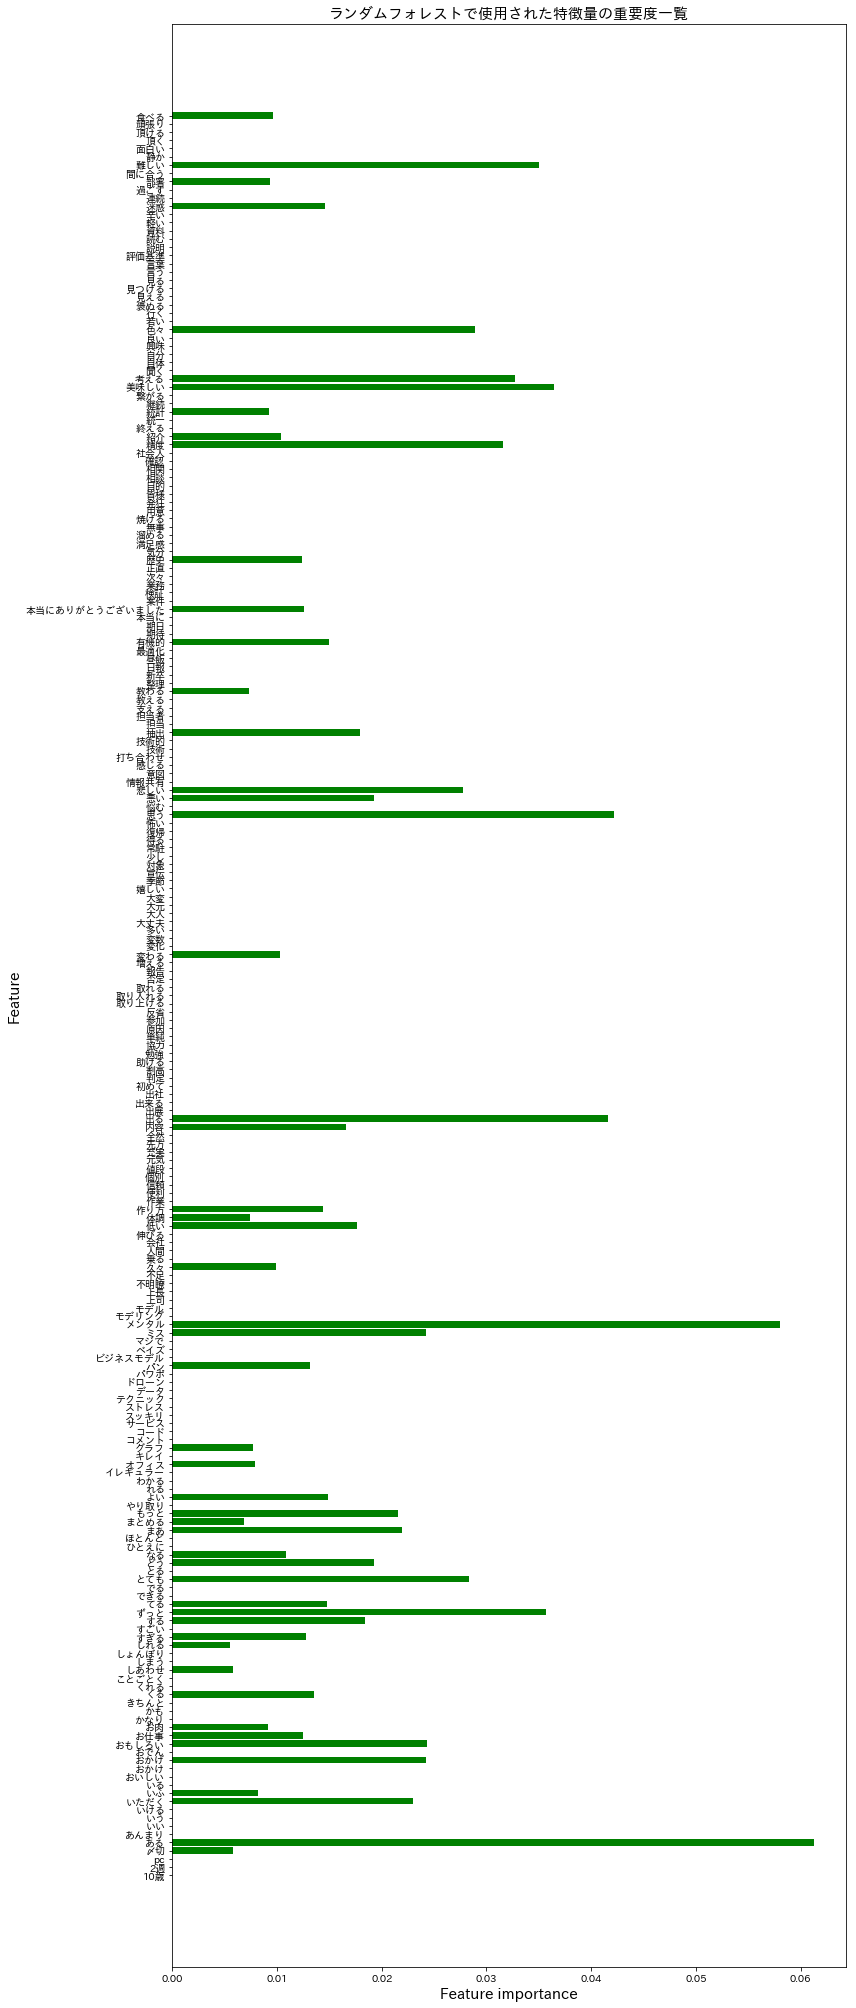

In [24]:
def plot_feature_importance(model):
    n_features = train_X.shape[1]
    plt.figure(figsize=(12, 28))
    # matplotlib.pyplot.barh(y(座標), width, height=0.8, left=None, *, align='center', **kwargs)
    plt.barh(range(n_features), best_model.feature_importances_, align='center', color='green')#align=”center”で文字列を左端ではなく中央に配置する
    # matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)
    plt.yticks(np.arange(n_features), train_X.columns)#y軸の目盛りの書き換え
    plt.title('ランダムフォレストで使用された特徴量の重要度一覧', fontsize = 15)
    plt.xlabel('Feature importance', fontsize = 15)
    plt.ylabel('Feature', fontsize = 15)
    plt.tick_params(labelsize = 10)#目盛りの数字（今回の場合は文字）の大きさを変更
    plt.tight_layout()#ラベルが収まるように表示させる
    
# 可視化
plot_feature_importance(best_model)

In [25]:
# 特徴量を重要度の大きい順に格納したデータフレームを作成

# range(0, len(best_model.feature_importances_)：0~特徴量の数まで
f = pd.DataFrame({'number': range(0, len(best_model.feature_importances_)),
             'feature_importances_': best_model.feature_importances_})
# [best_model.feature_importances_]はnumpy.ndarray型
# [0.         0.         0.         0.00577637...]といった出力形式
f2 = f.sort_values('feature_importances_', ascending=False)
# ソートした結果、インデックス番号が0からスタートしていないのでreset_index()を実施
# 引数に何もないと新しくindexカラムが生成される。その挙動を防ぐため[drop=True]を引数に与える
f3 = f2.reset_index(drop=True)
f3.head()

,number,feature_importances_
0,4,0.061269
1,67,0.058052
2,129,0.042188
3,92,0.041648
4,181,0.036457


### 特徴量を重要度の大きい順に出力していくfor文

In [26]:
# 参考URL：http://aiweeklynews.com/archives/50653819.html
# 特徴量を重要度の大きい順に出力していくfor文

# 特徴量の名前
label = train_X.columns[0:]#[train_X.columns]のみでも同じ
# 「Index(['10歳', '2週', 'pc', ... ,'食べる']」という形式になっている

# 特徴量の重要度順（降順）
# 降順にしたい場合はスライス[::-1]を使う
indices_desc = np.argsort(best_model.feature_importances_)[::-1]
# [  4  67 ... 0]といった出力形式

# label[indices_desc[i]] = label[np.argsort(best_model.feature_importances_)[::-1][i]：特徴量の名前
# label[indices_desc[i]] = label[4] ,つまりインデックス番号が4の要素（特徴量名）が抽出される

# best_model.feature_importances_[indices_desc[i]] = best_model.feature_importances_[np.argsort(best_model.feature_importances_)[::-1][i]：特徴量の重要度（数値）
# [best_model.feature_importances_]はnumpy.ndarray型でありリスト型のように要素を[0], [0:2]のように指定してアクセスすることが可能
# best_model.feature_importances_[indices_desc[i]] = best_model.feature_importances_[4], つまりインデックス番号が4の要素（重要度の大きさ）が抽出される
for i in range(len(best_model.feature_importances_)):
    print(str(i + 1) + "   " + str(label[indices_desc[i]]) + "   " + str(best_model.feature_importances_[indices_desc[i]]))

1   ある   0.061269302289437444
2   メンタル   0.05805191328814967
3   思う   0.042187636379506
4   出る   0.04164810690423166
5   美味しい   0.0364572137569945
6   ずっと   0.03566144388439545
7   難しい   0.03503624035538938
8   考える   0.03269796869796875
9   精度   0.031578947368421095
10   色々   0.02893278903630265
11   とても   0.02837837837837836
12   悲しい   0.02777198217923904
13   おもしろい   0.024358974358974394
14   ミス   0.0242754481560452
15   おかげ   0.024202602252449183
16   いただく   0.022975102426725433
17   まあ   0.02198179632491842
18   もっと   0.021545584045584047
19   どう   0.01927762783025943
20   悪い   0.0192753623188406
21   する   0.01837050121439609
22   抽出   0.017948717948717975
23   低い   0.01763924632311162
24   内容   0.016569200779727105
25   有機的   0.014924049380694613
26   よい   0.014912280701754349
27   てる   0.014784014784014744
28   迷惑   0.014605923288558078
29   作り方   0.014439395648172097
30   くる   0.013513513513513481
31   パン   0.013167013167013117
32   すぎる   0.012802275960170719
33   本当にありがとうございました

## 可視化２（重要度順にソート）

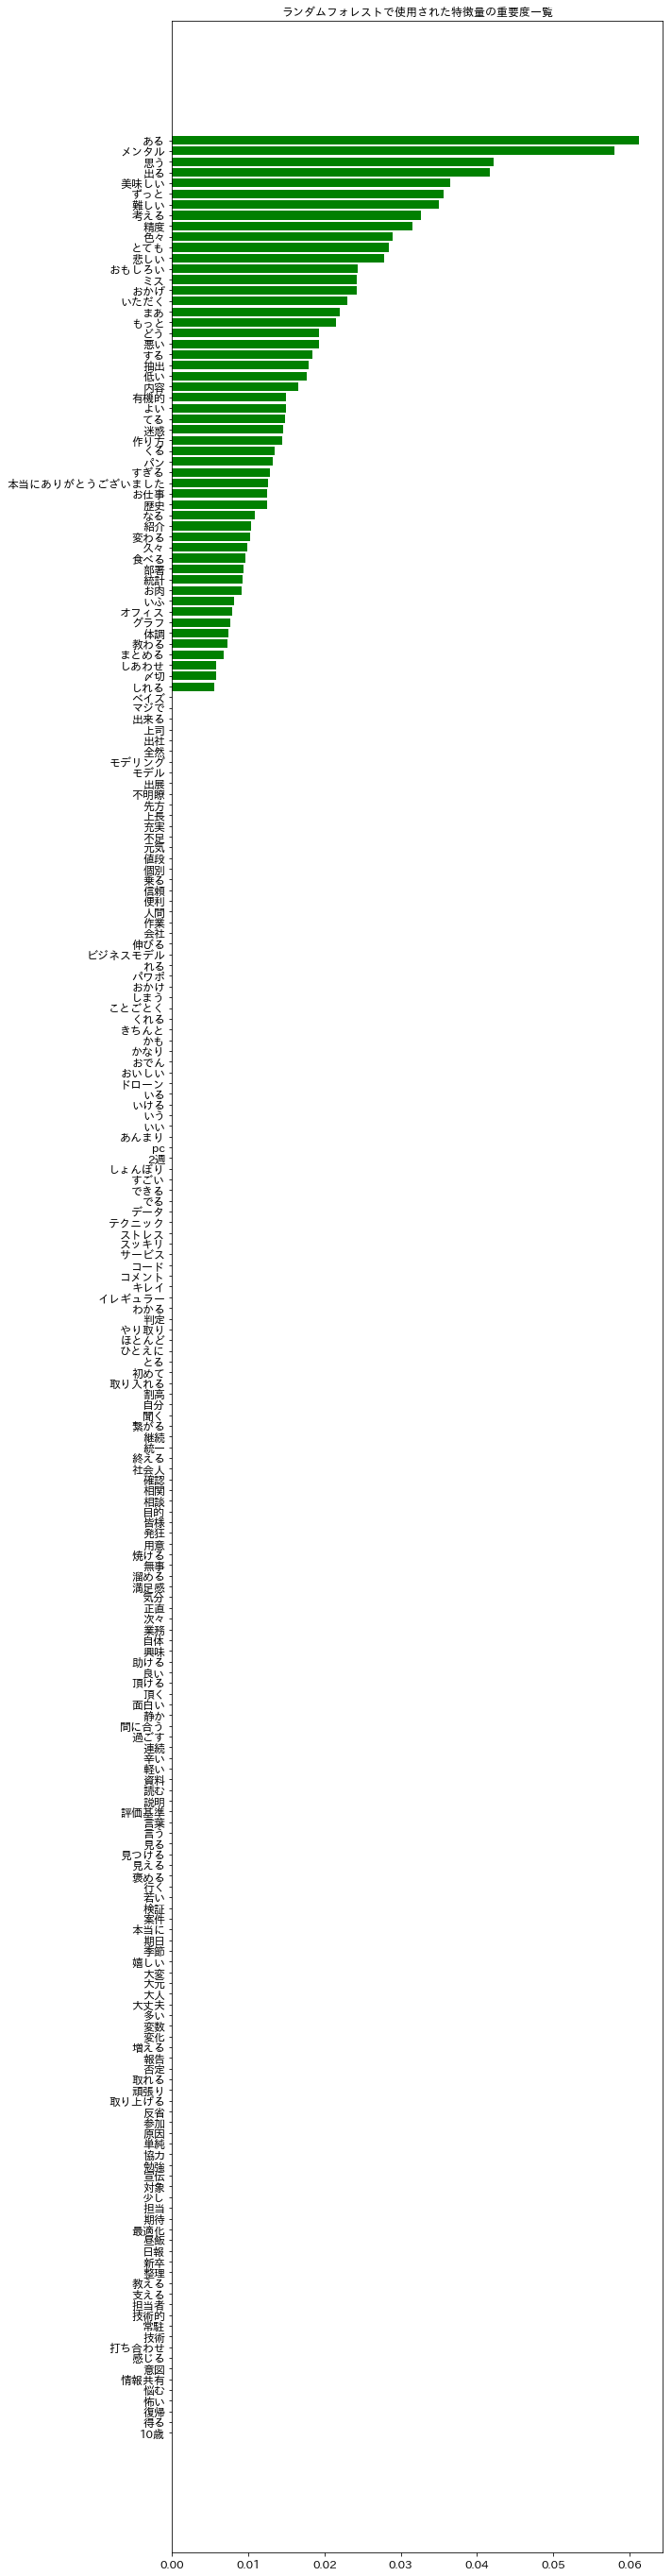

In [27]:
# 参考URL：http://aiweeklynews.com/archives/50653819.html
# 特徴量の重要度順（昇順）
# np.argsort()は値ではなく並び替えたインデックス番号（元のndarrayでの位置 = 0始まりの順番）のndarrayを返す。
indices_asc = np.argsort(best_model.feature_importances_)
# [  0 126 127...4]のnumpy.ndarray型で出力される

# 特徴量の名前
label = train_X.columns[0:]#[train_X.columns]のみでも同じ

plt.figure(figsize=(10, 38))
plt.title('ランダムフォレストで使用された特徴量の重要度一覧')
# matplotlib.pyplot.barh(y, width, height=0.8, left=None, *, align='center', **kwargs)
# best_model.feature_importances_[indices_asc] : 重要度の数値の大きさ（[indices_asc]で紐づけている）
plt.barh(range(len(best_model.feature_importances_)), best_model.feature_importances_[indices_asc], color='green', align='center')
# matplotlib.pyplot.yticks(ticks=None, labels=None, **kwargs)
plt.yticks(range(len(best_model.feature_importances_)), label[indices_asc])
plt.tick_params(labelsize = 12)#目盛りの数字（今回の場合は文字）の大きさを変更
plt.tight_layout()

##### 参考URL：https://datumstudio.jp/blog/%e3%80%90%e7%89%b9%e5%88%a5%e9%80%a3%e8%bc%89%e3%80%91-%e3%81%95%e3%81%81%e3%80%81%e8%87%aa%e7%84%b6%e8%a8%80%e8%aa%9e%e5%87%a6%e7%90%86%e3%82%92%e5%a7%8b%e3%82%81%e3%82%88%e3%81%86%ef%bc%81-3